In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("shop_smart_ecommerce.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# EDA 

Text(0.5, 1.0, 'Revenue generated or not')

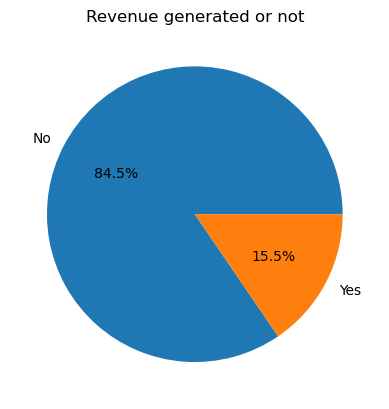

In [5]:
Rev_cnt = df["Revenue"].value_counts()

plt.pie(Rev_cnt,labels=["No","Yes"], autopct="%1.1f%%")
plt.title("Revenue generated or not")

[Text(0, 0, '3364'),
 Text(0, 0, '2998'),
 Text(0, 0, '1907'),
 Text(0, 0, '1727'),
 Text(0, 0, '549'),
 Text(0, 0, '448'),
 Text(0, 0, '433'),
 Text(0, 0, '432'),
 Text(0, 0, '288'),
 Text(0, 0, '184')]

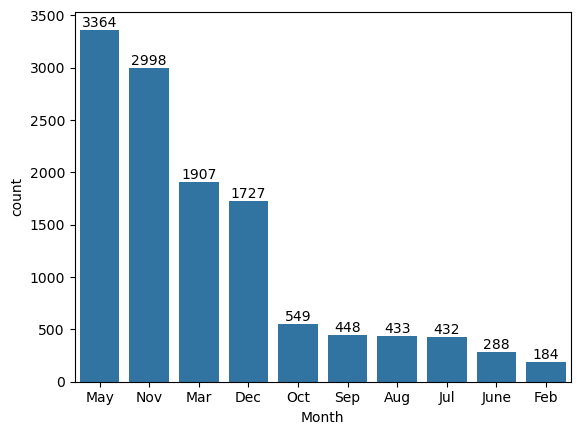

In [6]:
month_cnt = df["Month"].value_counts()

ax = sns.barplot(month_cnt)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Revenue', ylabel='ProductRelated'>

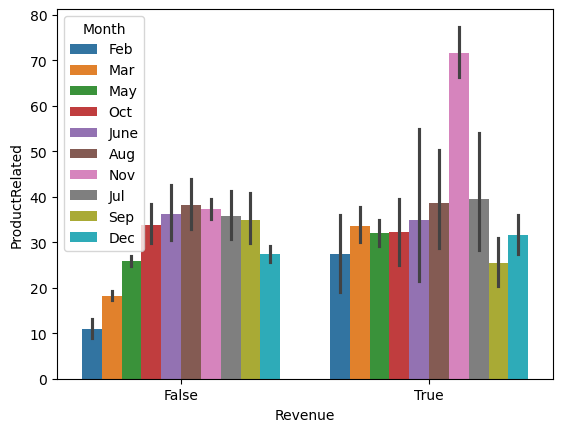

In [7]:
sns.barplot(
    data=df,
    y="ProductRelated",
    x="Revenue",
    hue="Month"
    
)

<Axes: xlabel='Weekend', ylabel='Revenue'>

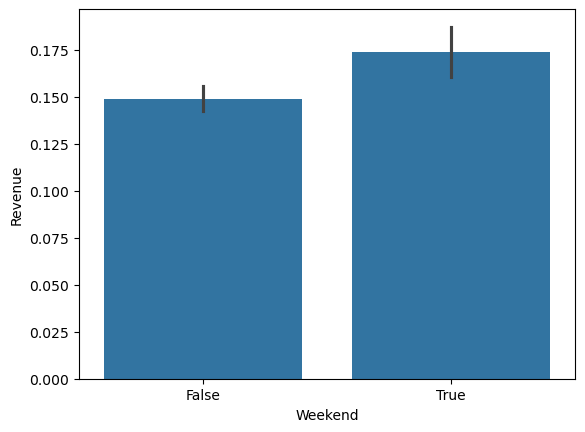

In [8]:
sns.barplot(
    data=df,
    x="Weekend",
    y="Revenue"
)

<Axes: xlabel='VisitorType', ylabel='Revenue'>

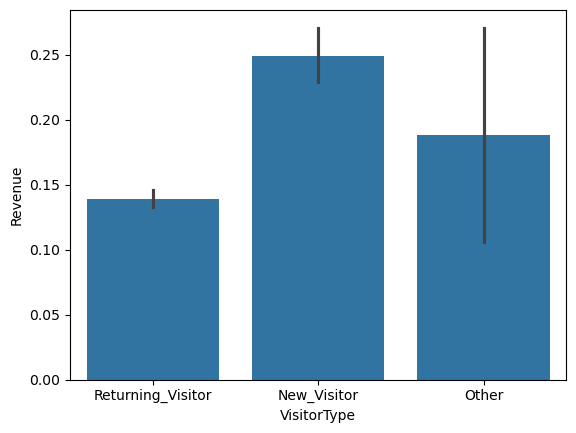

In [9]:
sns.barplot(
    data=df,
    x="VisitorType",
    y="Revenue"
)

<Axes: xlabel='Month', ylabel='Count'>

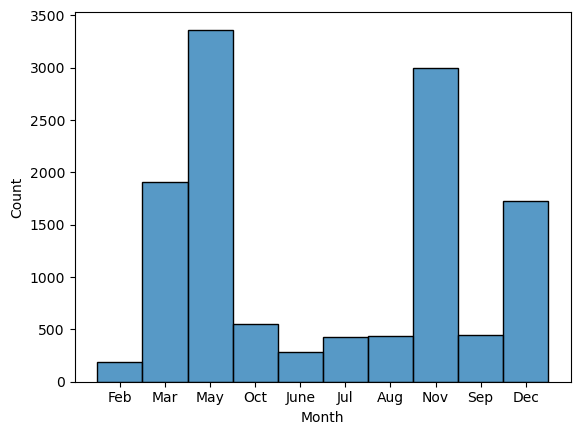

In [10]:
sns.histplot(
    data=df,
    x="Month",
    bins=20
    
)

<Axes: xlabel='Month', ylabel='Revenue'>

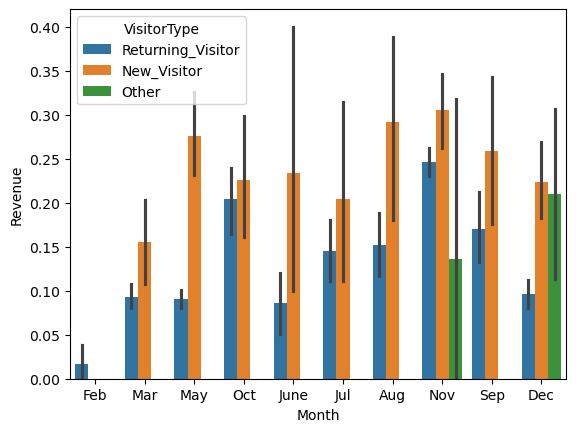

In [11]:
sns.barplot(
    data=df,
    x="Month",
    y="Revenue",
    hue="VisitorType"
)

<Axes: xlabel='Informational', ylabel='Count'>

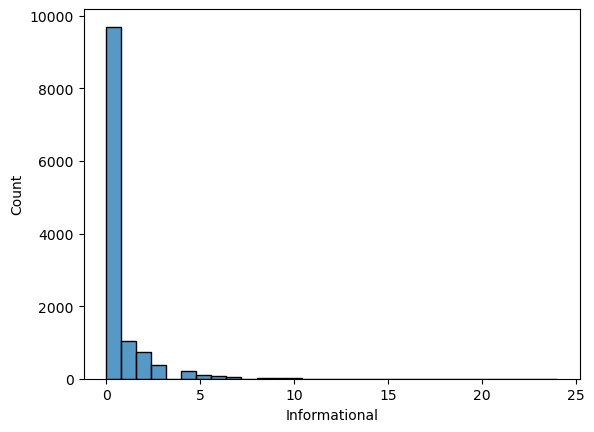

In [12]:
sns.histplot(
    data=df,
    x="Informational",
    bins=30
)

<Axes: xlabel='ProductRelated', ylabel='Count'>

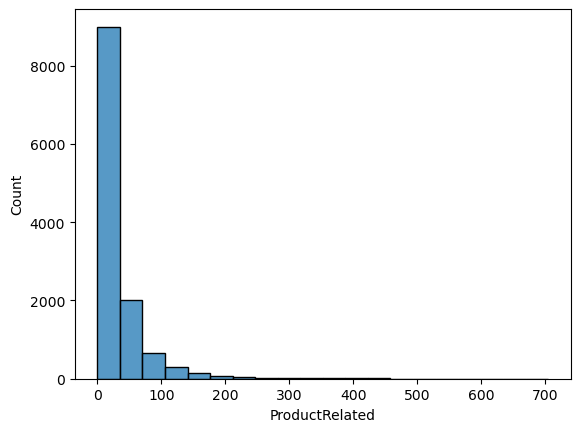

In [13]:
sns.histplot(
    data=df,
    x="ProductRelated",
    bins=20
)

# Encoding


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

df["Revenue"] = le.fit_transform(df["Revenue"])
df["Weekend"] = le.fit_transform(df["Weekend"])

df["VisitorType"] = le.fit_transform(df["VisitorType"])




In [20]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,2,1,0


In [21]:
col = ["Month"]

ohe = OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")
encoded = ohe.fit_transform(df[col])
encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(col),index=df.index)

df = pd.concat([df.drop(columns=col),encoded_df],axis=1)


In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
num_cols = df.select_dtypes(include="number")

corr_matrix = num_cols.corr()

In [24]:
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,...,0.138917,-0.014443,-0.065649,0.006221,-0.001902,-0.055036,-0.064587,0.051574,0.091266,0.059607
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,...,0.093587,-0.004990,-0.044524,-0.002096,-0.018974,-0.023198,-0.039318,0.032432,0.055101,0.031313
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,...,0.095200,0.002822,-0.040372,0.001896,0.007176,-0.027957,-0.038422,0.063754,-0.002619,0.009692
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,...,0.070345,0.010314,-0.028060,0.014958,-0.015407,-0.011545,-0.031811,0.036899,0.006434,0.001744
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,...,0.158538,-0.033909,-0.056863,0.020034,0.015072,-0.114672,-0.072220,0.182339,0.008907,0.005997
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,...,0.152373,-0.017563,-0.046550,0.002276,0.001506,-0.085491,-0.068133,0.166951,-0.008773,0.005950
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,...,-0.150673,-0.016999,0.063030,0.009766,0.041178,-0.004090,0.059062,-0.034281,-0.046044,-0.040081
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,...,-0.207071,-0.014700,0.078709,0.008852,0.048276,0.013439,0.072815,-0.056810,-0.062465,-0.050956
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,...,0.492569,0.020518,-0.033137,-0.018317,-0.020804,-0.044451,-0.015099,0.037856,0.032046,0.017439
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,...,-0.082305,-0.124635,0.106596,-0.058845,-0.047759,-0.132095,0.464809,-0.175039,-0.066666,-0.059966


<Axes: >

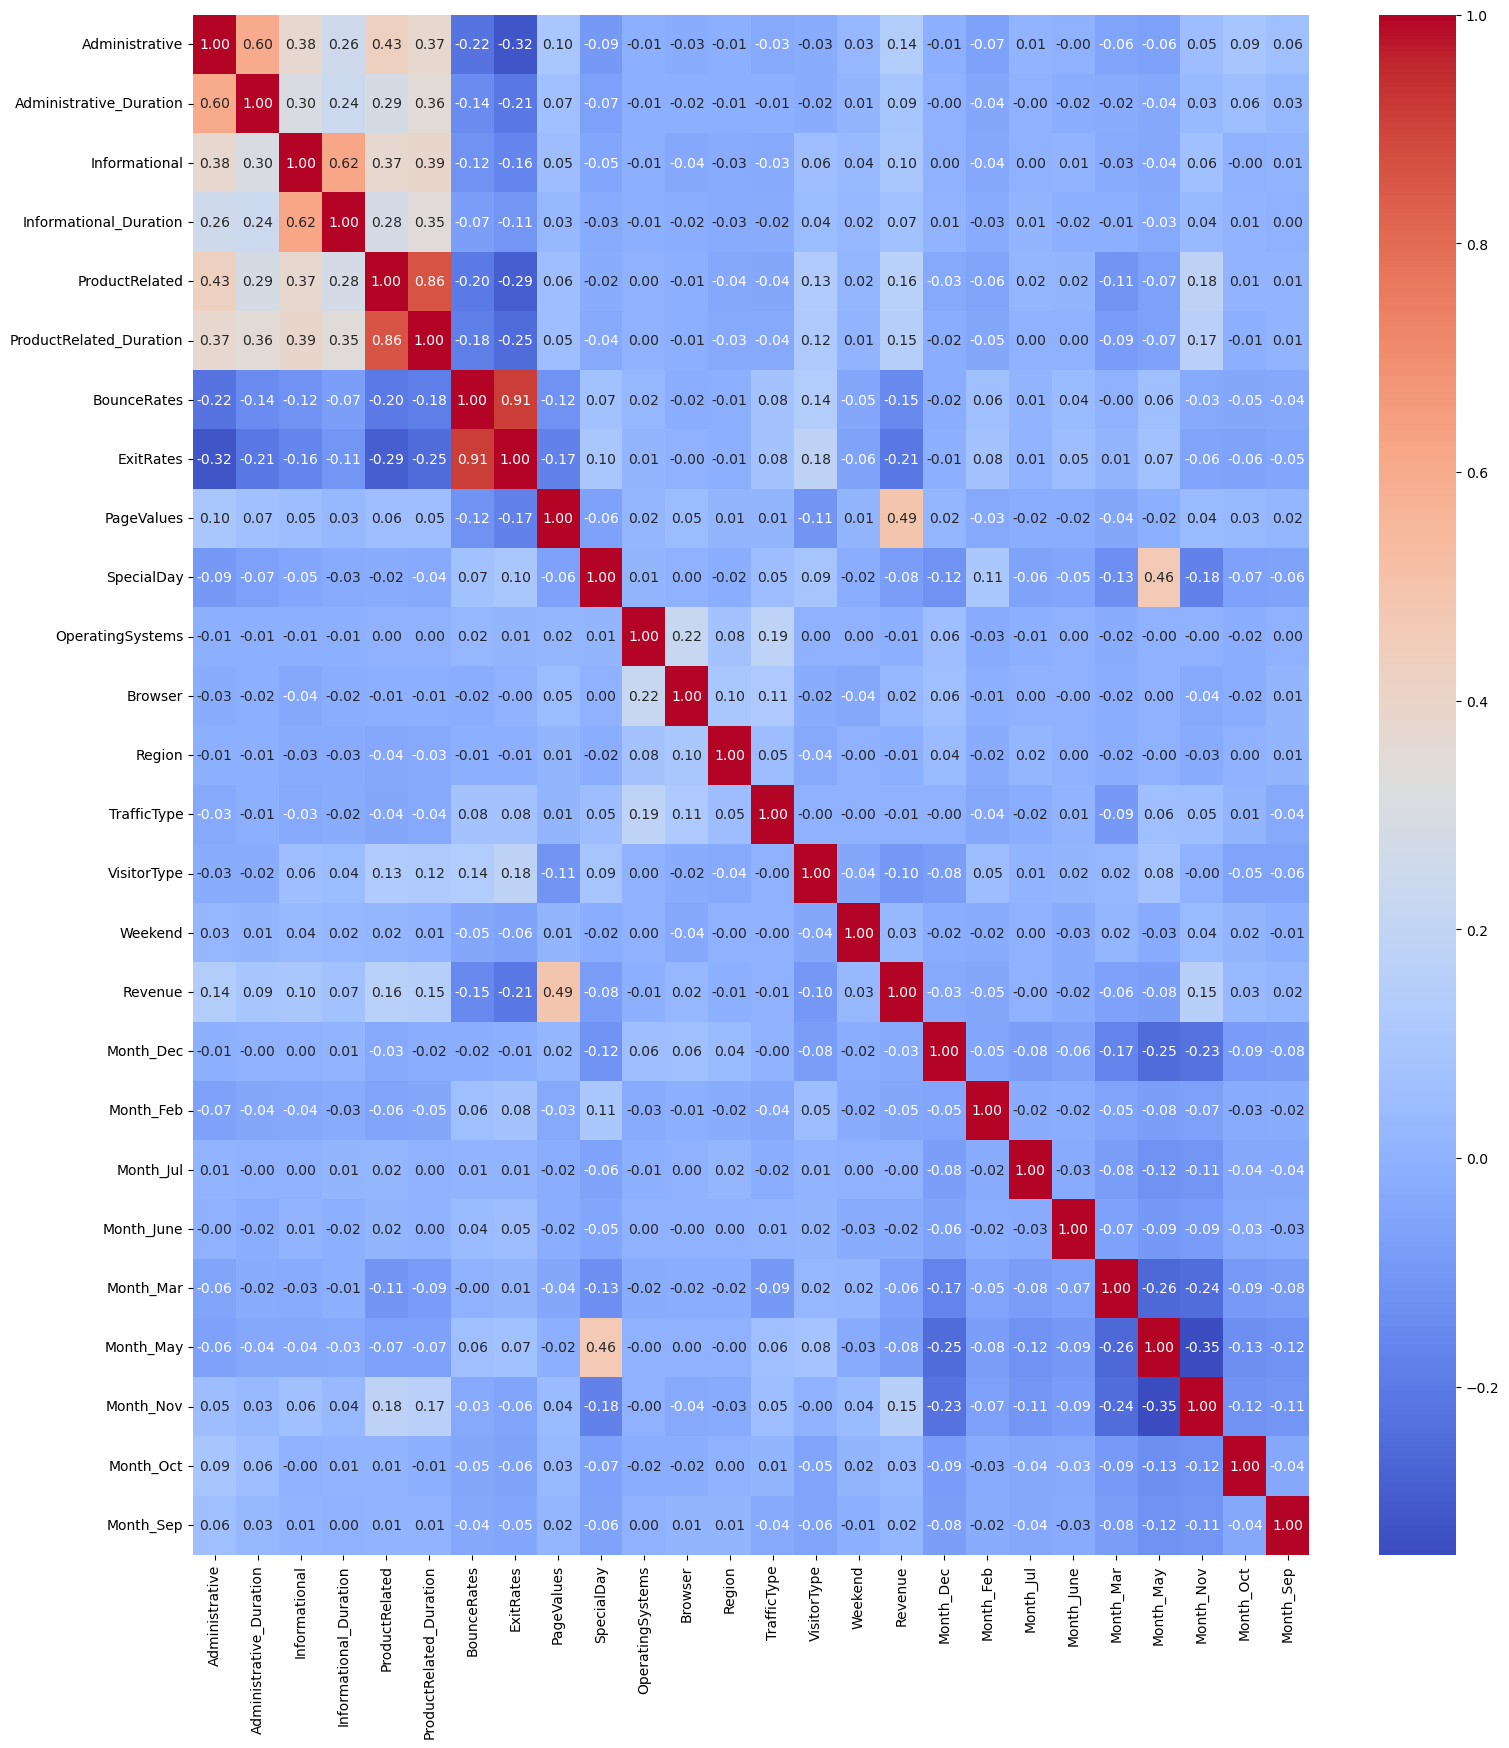

In [26]:
plt.figure(figsize=(18,20))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt = ".2f"
    
)

# Train Test Split + Feature scaling

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop("Revenue",axis=1)
y = df["Revenue"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state=42
)

In [29]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5,min_samples_split=5)

model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("accuracy: ",accuracy_score(y_test,y_pred))
print("precision score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

accuracy:  0.8888888888888888
precision score:  0.6974063400576369
recall score:  0.5888077858880778
f1 score:  0.6385224274406333


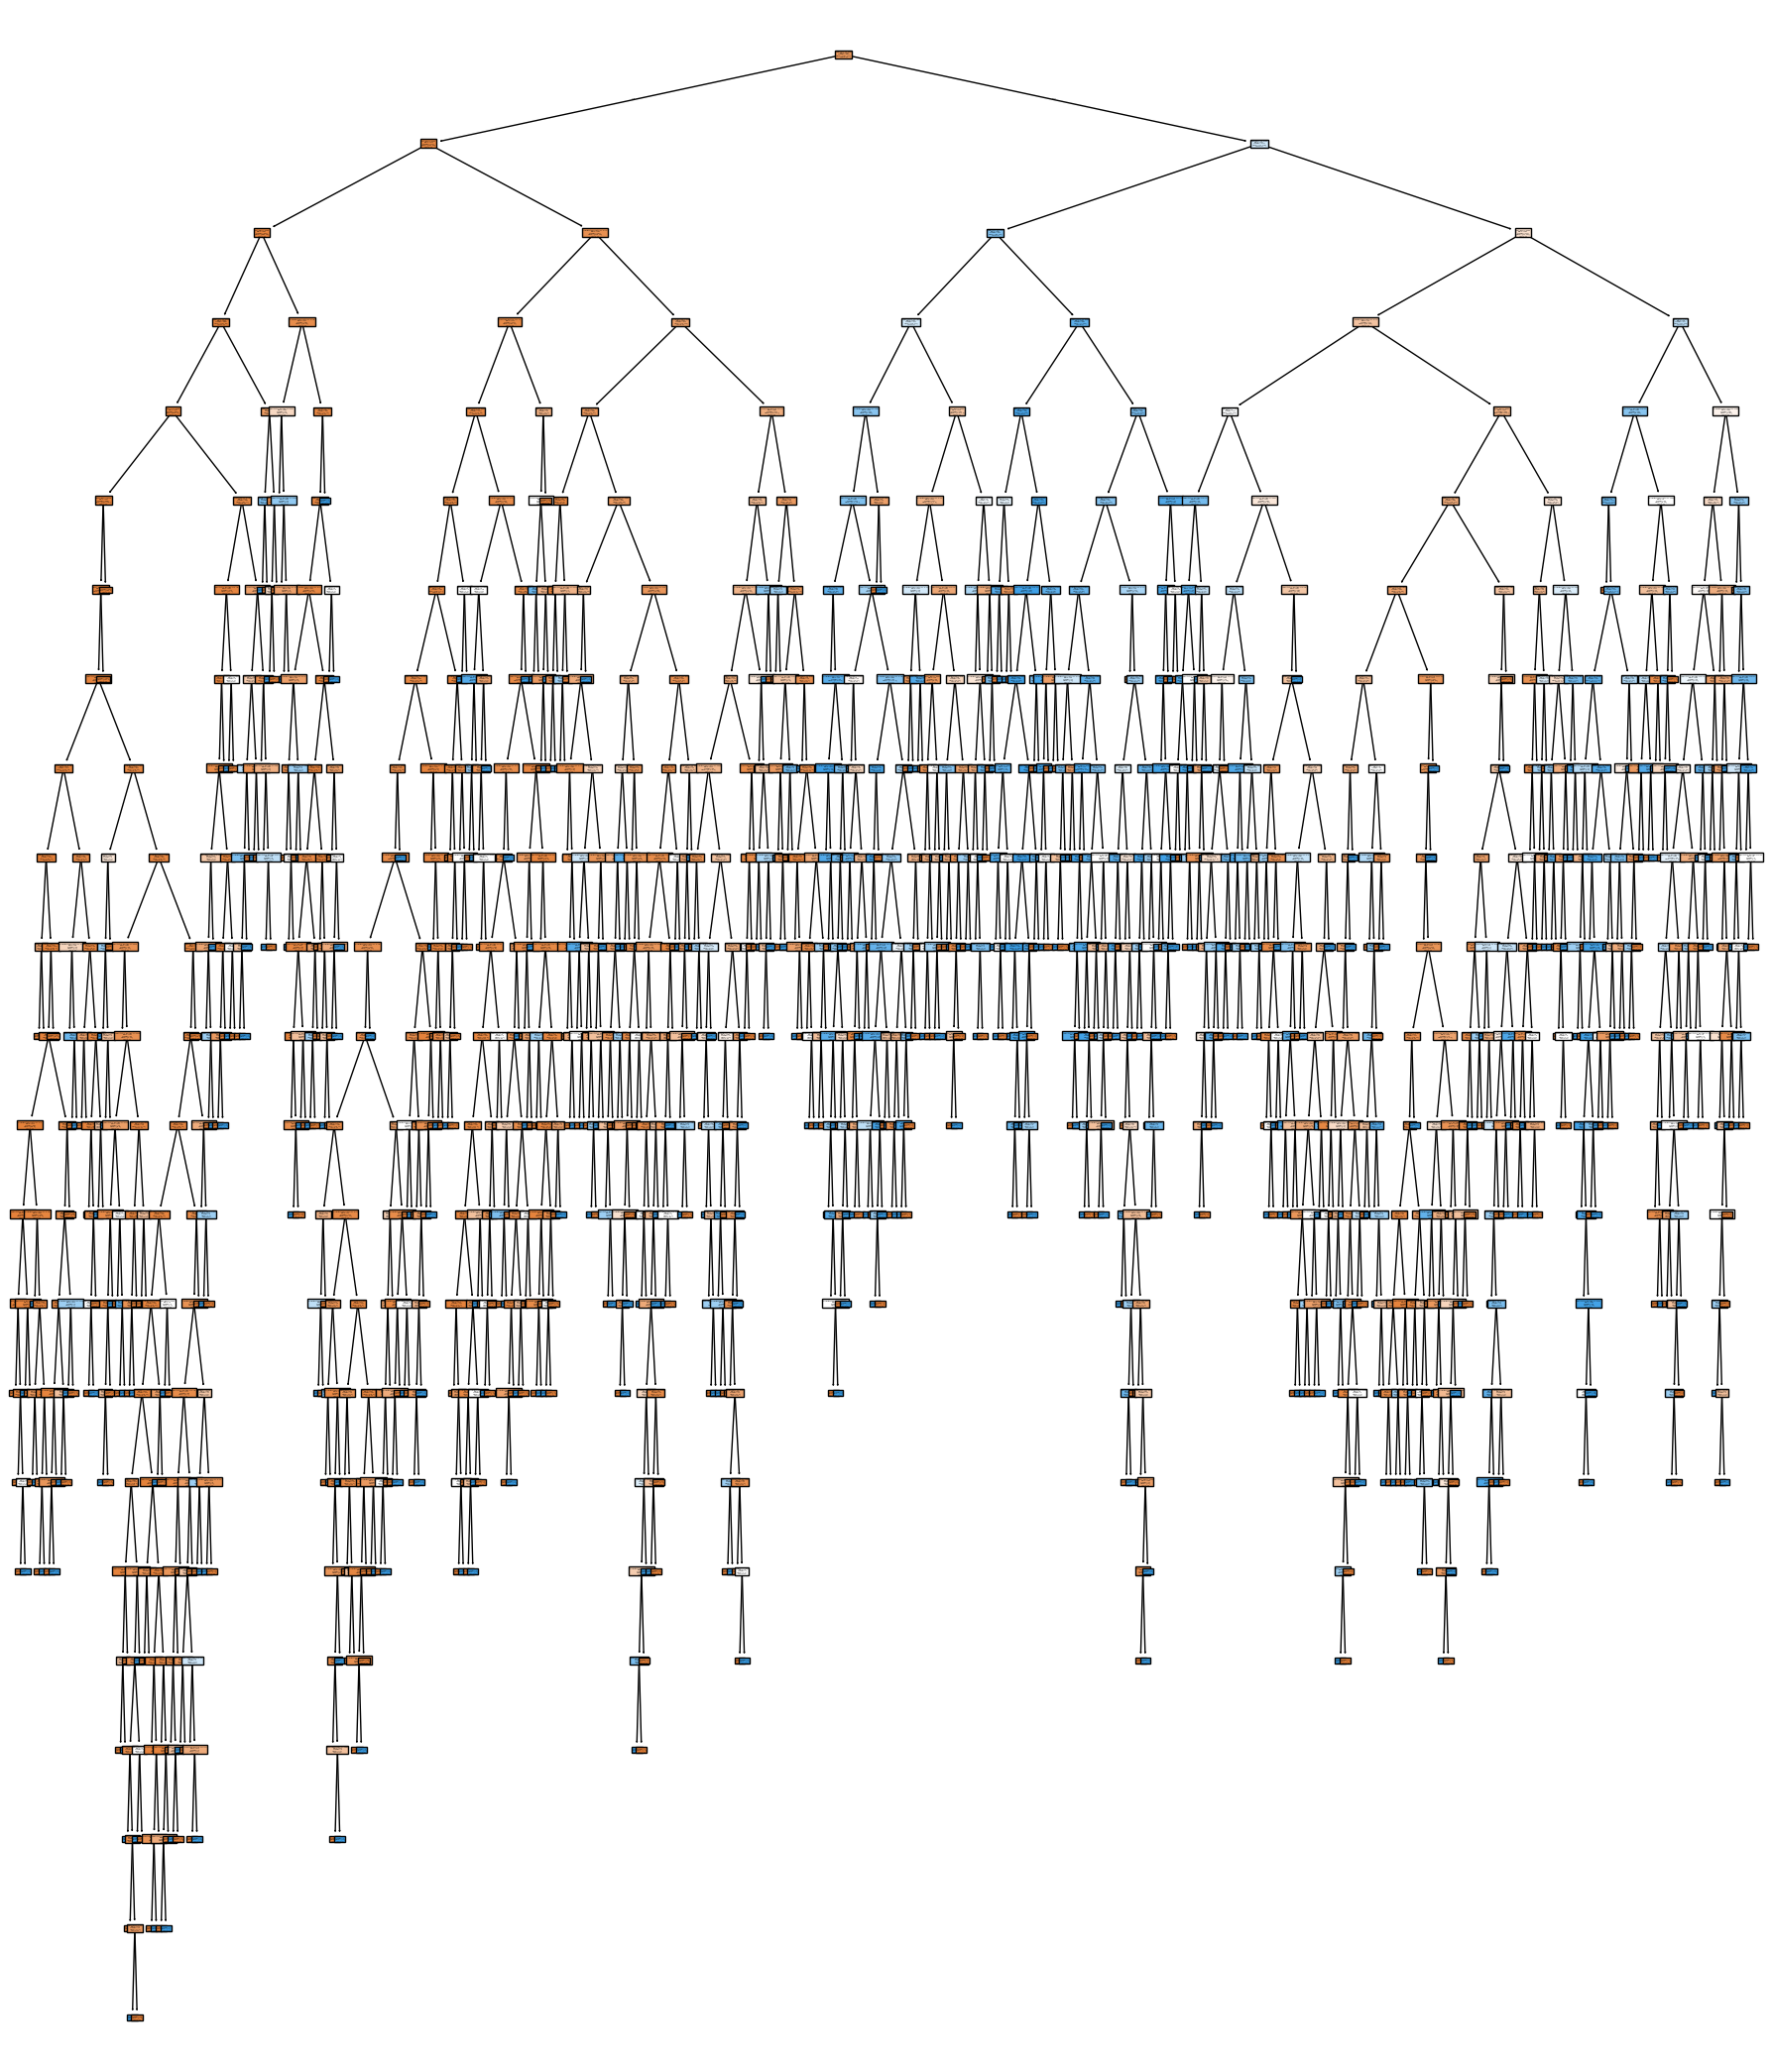

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18,21))
plot_tree(
    model,
    feature_names=X.columns,
    class_names = ["Yes","No"],
    filled=True
    
)
plt.tight_layout()
plt.show()

# Model with post pruning

In [54]:
full_tree = DecisionTreeClassifier()
full_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [55]:
path = full_tree.cost_complexity_pruning_path(X_train_scaled,y_train)
ccp_alphas =path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 5.04680245e-05 6.60140704e-05 6.64403114e-05
 6.67684446e-05 6.67999522e-05 6.69232278e-05 6.70578197e-05
 6.72124316e-05 6.73418418e-05 6.74631737e-05 7.85090604e-05
 7.89964294e-05 8.11030008e-05 8.68960723e-05 8.68960723e-05
 8.72536693e-05 8.87064071e-05 8.87064071e-05 8.87064071e-05
 8.87064071e-05 8.96812028e-05 9.01144453e-05 9.01144453e-05
 9.01144453e-05 9.01144453e-05 9.01144453e-05 9.07982102e-05
 9.12408759e-05 9.21625009e-05 9.32684509e-05 9.33751654e-05
 9.35803856e-05 9.35803856e-05 9.35803856e-05 9.35803856e-05
 9.35803856e-05 9.38692139e-05 9.41374117e-05 9.41374117e-05
 9.41374117e-05 9.44980879e-05 9.46201676e-05 9.50425791e-05
 9.50425791e-05 9.50425791e-05 9.54152951e-05 9.55182436e-05
 9.57465982e-05 9.58810312e-05 9.60178457e-05 9.60430273e-05
 9.60430273e-05 9.61798407e-05 9.63098135e-05 9.65564703e-05
 9.67706260e-05 9.69709792e-05 9.72408428e-05 9.73236010e-05
 9.74795683e-05 9.78829320e-05 9.79994593e-05 9.80012253e-05
 9.81084687e-05 9.830666

In [57]:
# training for best alpha

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)

    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)

    trees.append((model, alpha, y_pred))

In [58]:
best_f1 = 0
best_alpha = 0

for model, alpha, y_pred in trees:
    curr_f1 = f1_score(y_pred,y_test)

    if curr_f1 > best_f1:
        best_f1= curr_f1 
        best_alpha = alpha

In [59]:
best_f1

0.6742502585315409

In [60]:
best_alpha

np.float64(0.01014735484966943)